# The Bayes theorem

In the previous chapter, we defined the concept of probability and probability distributions. We saw that in our experiment where we toss a coin many time, we can use the binomial distribution to obtain the likelihood of experimental outcomes given different probabilities of obtaining tails. However, as we saw in the end, while the likelihood computed with the binomial distribution function is related to how confident we should be that the coin isn't biased, it is not exactly the same. We need to be able to go from $P(y|P(X=1))$ to $P(P(X=1)|y)$. This is exacty what the Bayes Theorem enables us to do. But before introducing it, we need to revise our notation to be more general purpose. 

In our coin toss example, we would like to know the probability of obtaining head, which we wrote as $P(X=1)$. However, this notation is very specific to a problem with a binary outcome. In Bayesian inference, we are generally interested in know the value of one or several parameters $\Theta$, which happens in our coin toss problem to be $P(X=1)$. To that end, we used the binomial distribution to investigate the probability of a number of head out of a total number of throw. These are our empirical data and these are generally written as $y$. So when you read $P(y|\Theta)$, you can read 'The probability of our data given the value of our parameter of interest' and in the specific case of our coin toss example as 'The probability of getting k times head, given the probability of head'.

The Bayes theorem defined as:
$$P(\Theta|y) = \frac{P(y|\Theta)*P(\Theta)}{P(y)}$$

As you can see, it is a way to relate $P(y|\Theta)$ to $P(\Theta|y)$. You will often hear that the Bayes theorem is a mathematical framework to update our beliefs about an unknown parameter based on empirical data. This is exactly what we have been trying to do since the beginning, just phrased in a different way. We want to know if our coin is biased, and for that we run an experiment to try to decide whether it is biased or not. This is the same as saying: I believe that the coin is balanced, and I want to know whether this belief is true based on something I have observed. Not that this is also (almost) the same as saying "I believe that this coin is not balanced, and I want to know whether this belief is correct based on my observations". 

To go from $P(y|\Theta)$ to $P(\Theta|y)$, we need to multiply $P(y|\Theta)$ with $P(\Theta)$ and dividing it by $P(y)$. $P(\Theta)$ is the **prior**, and $P(y)$ is the **marginal likelihood or model evidence**. The $P(\Theta|y)$ is called the **posterior**,  because it is our updated belief in the true value of $P(\Theta)$ after seeing the data. We will now explain what these are and then we will see how we can solve the Bayes theorem for our simple problem.

## Prior distribution
The prior is the same thing as your belief, or your hypothesis about the true value of the parameter, which you want to test. If your starting hypothesis is that the coin is not biased, then you are basically saying that you believe the most probable value for theta is 0.5. If you are very certain about that, you would say: I believe the probability of $\Theta=0.5$ is 1. So for this particular coin, you are a 100% sure that it is not biased and that any other values of $\Theta$ are basically impossible. If you were to express it as a graph, then it would probably look something like this:

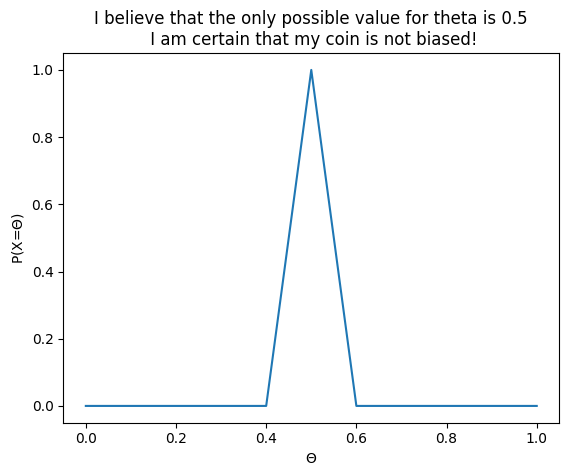

In [11]:
import matplotlib.pyplot as plt

theta_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Values of theta between 0 and 1
theta_proba  = [0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # Probability of each value of theta

fig, ax = plt.subplots()
ax.plot(theta_values, theta_proba)
ax.set_xlabel("$\\Theta$")
ax.set_ylabel("P(X=$\\Theta$)")
ax.set_title("I believe that the only possible value for theta is 0.5\n I am certain that my coin is not biased!")
plt.show()
plt.close()

As we can see, this is kind of representing what we want to say, but this is not perfect. For $\Theta=0.5$, we do have a value of 1, but it looks like at $\Theta=0.45$, we don't have zero. That's to be expected. The simple way we have implemented our belief only specified values for 0.1, 0.2..., but nothing in between, so in the plot above, the dots are connected by taking a straightline between the missing points. We could for sure try to define many more points per hand, but that wouldn't be very efficient. And it would also never be perfect, except if we were to generate an infinity of points, which we of course can't do either. 

Here again, what we are looking for is a probability distribution. We want to define a function that specifies how likely we believe each value of $\Theta$ is. We believe that $\Theta=0.5$ is very likely because we believe that our coin isn't biased. Note that we could also believe something else, for example that our coin isn't balanced and that it is more likely to land on head than on tail. Either way, we need to find a function that allow us to specify a probability for any possible values of $\Theta$. And here again, we need the probability for each $\Theta<=1$ and the sum of all probablities to be one, because ultimately, there is only a single true value for $\Theta$. 

For the sake of the example, we will say that our starting hypothesis is "I believe that the coin isn't biased, therefore I believe that $\Theta$ values close to 0.5 are most likely, and values far away from 0.5 are less likely". We need to find a **probability distribution** to represent our belief about the likelihood of the $\Theta$ values. There is an infinity of mathematical function that we can use to represent our belief. The question is which one to choose? Well first of all, we need a function that is as simple as possible. There is an infinity of functions we could use, but some of them would require specifying many unintuitive parameters with complex relationships making it difficult to specify what we believe. Ideally a function that takes only a few inputs, with each input corresponding to something that makes intuitive sense would be practical. 

You might think, why not use the binomial distribution directly? The binomial distribution won't work in that case. That's because unlike the outcome of our experiment, our priors on the true value of theta doesn't depend on the number of toss we make: the true value of $\Theta$ is universaly true. There are other reasons as to why the Binomial distribution won't work in that case, but we won't go into it here, to keep things simple. 

So we need to find a formulae that encodes our belief about the probability of each value of $\Theta$, and that function should be simple to work with. There is another thing to consider when selecting a prior: how well does it work with the likelihood we have defined? In the case of our coin toss example, we said that the likelihood is a binomial distribution. For other problems, we will use different likelihood functions. As you see in the Bayes theorem, to obtain the **posterior**, we will need to multiply the **likelihood** with our **prior** and divide the whole thing by the **marginal likelihood**. And as we will see below, depending on which pair of distribution we use as prior and likelihood, doing all of that might be easy, complicated or even impossible. This means that if we can, we should choose a distribution for the **prior** that will make the math down the line easy if we can. Pairs of distributions that work well together are called **conjugate**, and when trying to define a prior, you should first look at whether there is a prior that is the conjugate of the likelihood function you use for your problem. If there is, go for it. As we will see later, very often, there isn't and it is for such cases that we need to use advanced maths like variational Laplace.

### Beta distribution
For the Binomial likelihood, a conjugate does exists, and it is the beta distribution. It is defined like so:

$$f(\Theta) = \frac{x^{\alpha-1}(1-\Theta)^{\beta-1}}{B(\alpha, \beta)}$$

Where:

$$B(\alpha, \Beta)=\frac{\Gamma(\alpha)\Gamma(\Beta)}{\Gamma(\alpha+\beta)}$$

Where:

$$\Gamma(n) = (n-1)!$$

Okay, ouch. So the $\beta$ distribution is a function which consists of another function, and that other function also contains another function, and we have three different greek letter... That looks intimidating. But in fact, it is really quite alright, you just need to spend time to look at it carefully. And in fact, the reason why we have three functions defined above is just because mathematicians are also frightned by long formulae, so they break them down in bits and pieces that makes it easier to manage for them as well. If that makes you feel better, you can also rewrite the beta distribution in one line:

$$f(\Theta) = \frac{\Theta^{\alpha-1}(1-\Theta)^{\beta-1}}{\frac{(\alpha-1)!(\beta-1)!}{(\alpha + \beta -1)!}}$$

The way I have written the $\Gamma$ function above is a bit of a simplification. The formulae I wrote will only work for integer values (1, 2, 3...). But there is a more general form that looks a little bit more complicated that will work for basically any number, but let's keep the math simple for now.

And we can write the beta distribution as a piece of code:

In [8]:
from math import gamma

def beta_distribution(theta, alpha, beta):
    """
    Compute the probability density of the Beta distribution at a given value theta for parameters alpha and beta.

    The Beta distribution is defined as:
        Beta(theta, alpha, beta) = (theta^(alpha - 1) * (1 - theta)^(beta - 1)) / B(alpha, beta)

    where B(alpha, beta) = (Gamma(alpha) * Gamma(beta)) / Gamma(alpha + beta).
    
    Parameters:
        theta (float): The value at which to evaluate the Beta distribution (0 <= theta <= 1).
        alpha (float): The shape parameter alpha (> 0).
        beta (float): The shape parameter beta (> 0).

    Returns:
        float: The probability density of the Beta distribution at x.
    """
    # Ensure x is within the valid range
    if theta < 0 or theta > 1:
        raise ValueError("x must be between 0 and 1.")
    if alpha <= 0 or beta <= 0:
        raise ValueError("alpha and beta must be positive.")
    
    # Compute the denominator:
    denom = (gamma(alpha) * gamma(beta))/(gamma(alpha + beta))  # The Beta(alpha, beta) = (Gamma(alpha) * Gamma(beta)) / Gamma(alpha + beta) above. And instead of using the factorial, we are using the gamma function that will work with any numbers

    # Compute the numerator:
    numer = theta ** (alpha - 1)*(1-theta)**(beta-1)

    # Return the probability of beta at this particular value of x with alpha and beta:
    return numer/denom 

That doesn't seem all that crazy after all now does it? You might still wonder what the alpha and beta parameters are for. Well these are parameters you can adjust to control the shape of the distribution. Let's try to play around with alpha and beta to get a sense of what they do:

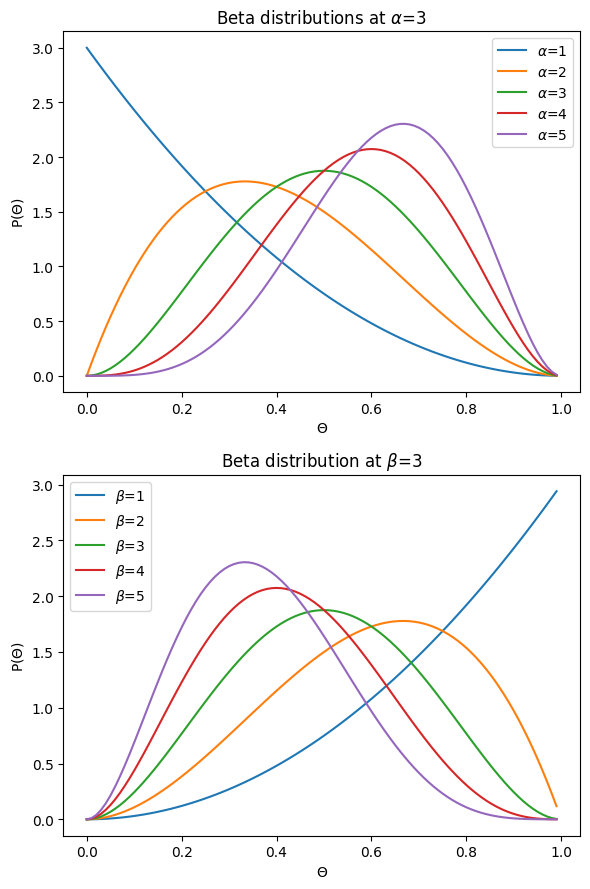

In [9]:
import numpy as np

thetas = np.arange(0, 1, 0.01)  # Say this is x=theta, we want to get the P(x) at each values of x, for a given value of alpha and beta:
alphas = [1, 2, 3, 4, 5]  # Try values of alpha from 1 to 5
betas = [1, 2, 3, 4, 5]  # Try values of beta from 1 to 5

fig, ax = plt.subplots(2,1, figsize=[6, 9])

# Vary alpha:
for alpha in alphas:
    ax[0].plot(thetas, [beta_distribution(theta, alpha, 3) for theta in thetas], label=f"$\\alpha$={alpha}")
ax[0].set_xlabel("$\\Theta$")
ax[0].set_ylabel("P($\\Theta$)")
ax[0].set_title("Beta distributions at $\\alpha$=3")
ax[0].legend()
# Vary beta:
for beta in betas:
    ax[1].plot(thetas, [beta_distribution(theta, 3, beta) for theta in thetas], label=f"$\\beta$={beta}")
ax[1].set_xlabel("$\\Theta$")
ax[1].set_ylabel("P($\\Theta$)")
ax[1].set_title("Beta distribution at $\\beta$=3")
plt.legend()
plt.tight_layout()
plt.show()


So we can see from the graphs above that when we increase alpha, we somehow move the distribution to the right, and when we increase beta, we move the distribution to the left, and that when alpha=beta, we have a symetrical distribution. In our case, we probably want a prior that is symetrical. If we believe that the coin isn't biased, we think the most likely value is in the middle and that values on the left or on the right are equally unlikely. But in the case above, when we set alpha and beta to 3, the distribution is quite wide, which would mean that we believe that while we believe $\Theta=0.5$, we wouldn't be crazy surprised to learn that it is as large as 0.8, or as low as 0.2. That doesn't seem to match our initial assumption that we are very confident that the coin isn't biased. Let's try other values:

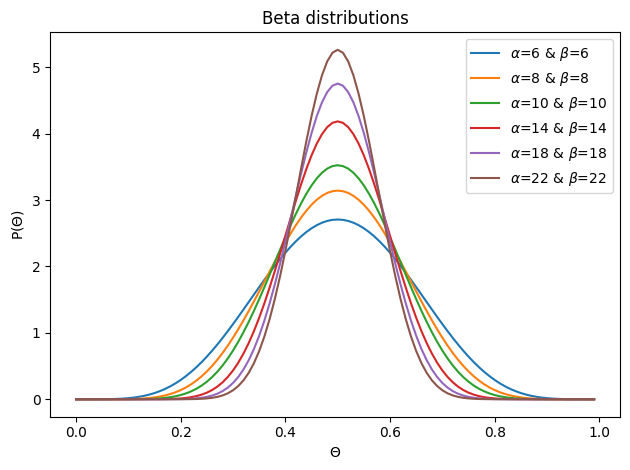

In [10]:
thetas = np.arange(0, 1, 0.01)  # Say this is x=theta, we want to get the P(x) at each values of x, for a given value of alpha and beta:
alphas = [6, 8, 10, 14, 18, 22]  # Try values of alpha
betas = [6, 8, 10, 14, 18, 22]  # Try values of beta

fig, ax = plt.subplots()

# Vary alpha:
for i, alpha in enumerate(alphas):
    ax.plot(thetas, [beta_distribution(theta, alpha, betas[i]) for theta in thetas], label=f"$\\alpha$={alpha} & $\\beta$={betas[i]}")
ax.set_xlabel("$\\Theta$")
ax.set_ylabel("P($\\Theta$)")
ax.legend()
ax.set_title("Beta distributions")
plt.legend()
plt.tight_layout()
plt.show()


The larger alpha and beta are, the tighter the distribution seems to be getting. Let's take the values of $\alpha=22, \beta=22$, which means we are initially quite confidence that the true value of $\Theta=0.5$.

You might wonder: "Why does it matter how confident I am in my original value? I get the value I get in my experiment, and I will just believe what the experiments tells me". First of all, we have already seen that the experiment might very well give you something else than the true value, and you shouldn't accept blindly the results of your experiment as the ultimate truth. How much you should trust the results of your experiment very much depend on how much you trust your initial guess. Let's take the example of a 52 cards deck. Say you have counted each of the cards and confirmed: I have 4 Queens, 4 kings, 4 jacks... In that case, say you want to run an experiment what the probability is to get a king if you draw a card at random. Your prior should be something like that:

$$P(\Theta) = 4/52$$

Where $P(\Theta)$ is the prior probability of drawing a king, which 4/52, because you know you have 4 kings out of 52 cards. Now say you draw cards many many times, and somehow you end up with an observed $\hat{P}(\Theta)=0.5$. In that scenario, you of course wouldn't believe that the results of the experiment, because you know for a fact that $P(\Theta)=4/52$. So in that example, you shouldn't change your mind all that much based on experimental results, because you have very high confidence of what the true $P(\Theta)$ is. In fact, you have absolute confidence in it: you know for a fact that the probability of $P(\Theta)=4/52$ is 1 while any other values is 0, which is just a very particular probability distribution, which is very peaky. 

This is why, if you want to know the value of a parameter(s) of interest given empirical results ($P(\Theta|y)$), you should always factor in your prior, because it is going to influence the conclusion quite a bit. 

## Combining the prior and the likelihood
So we now know what the two following components are and what they are for in the quest of answering our question of whether a coin is biased:
- $P(y|\Theta)$: Likelihood (of the observed values given any value of $\Theta$)
- $P(\Theta)$: Prior, our belief about the likelihood of each $\Theta$ for our coin

To compute the numerator of the Bayes theorem, we need to mupltiply the prior with our likelihood. We have the following formulae for the likelihood:

$$P(y | \Theta) = \binom{n}{y} \Theta^y (1 - \Theta)^{n - y}$$

Where $n$ and $y$ are the number of throws and the number of success in our experiment, respetively. Let's say we fix our number of throw at a thousand. 

The prior is defined as a beta distribution like so:

$$P(\Theta) = \frac{\Theta^{\alpha-1}(1-\Theta)^{\beta-1}}{B(\alpha, \beta)}$$

Where $alpha$ and $beta$ depend on our degree of confidence, which we said should be $\alpha=22, \beta=22$. When you put the two distributions together, you might notice that they are quite similar. In fact, we can rewrite the prior distribution as follows to make it obvious:

$$P(\Theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\Theta^{\alpha-1}(1-\Theta)^{\beta-1}$$

Everything after the fraction is kind of the same as the binomial distribution. Or you could say that the two distributions are the same, just multiplied by different things: 
- The binomial distribution is something multiplied by the binomial coefficient $\binom{n}{k}$
- The beta distribution is a similar something, multiplied by a ratio of beta function (illustrated with $\Gamma$ above)

The something that is common to both is something like this:

$$x^{a}(1-x)^b$$

This something is a beta kernel. In general, when you see an expression like this multiplied by something else, it will take the shape of a beta function, similar to what we have above.

### Solving the numerator

To calculate the posterior, we need to solve the numerator:

$P(y|\Theta)P(\Theta)$

This requires a bit of maths. It's nothing complicated, just plugging in the formula of each term and rearranging stuff following the rules of mathematics, so that we we end up with a compact and simple formulae. But note that you don't even have to do any of that. You could very well write a chunky function just based on the multiplication of the two formulae and that would be totally fine. But that way, we can write the function more compactly and elegantly. Feel free to skip, but please don't skip because you are intimidated by maths, it is really simple, believe in yourself!

We can replace the formulae:

$$P(y|\Theta)P(\Theta) = [\binom{n}{k}\Theta^k(1-\Theta)^{n-k}][\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\Theta^{\alpha-1}(1-\Theta)^{\beta-1}]$$

First, we can take out all the bits that don't involve $\Theta$:
$$C=\binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}$$

So we have:

$$P(y|\Theta)P(\Theta) = C[\Theta^k(1-\Theta)^{n-k} \times \Theta^{\alpha-1}(1-\Theta)^{\beta-1}]$$

We can now combine the exponents of $\Theta$ and $(1-\Theta)$

$$P(y|\Theta)P(\Theta) = C[\Theta^{k+\alpha -1}(1-\Theta)^{n-k+\beta-1}]$$

### Another beta distribution
The final formulae once again looks quite familiar. We again have a beta kernel:

$$P(y|\Theta)P(\Theta) = C\times\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}$$

Where:

$$\alpha' = k+\alpha$$

$$\beta' = n-k+\beta$$

This implies that the numerator is going to be a beta distribution as well. As we will see in a little bit, the denominator (i.e. the marginal likelihood) is a constant with respect to $\Theta$ as you can already guess from the formulae. This means that the numerator will not have an impact on the kind of distribution of the posterior, simply scale it up and down. Accordingly, the family of distribution the posterior follows is dictated by the numerator. And to complete the story, when we mean that the prior is a conjugate prior, we mean that for a given likelihood function, the posterior is in the same probability distribution family as the prior. 

### The combined prior and likelihood
Similarly, in the combined formulae of the prior and the likelihood, the quantity C does not depend on $\Theta$ and accordingly, it won't be necessary to compute it. To see why, let's implement the formulae for the combined prior and likelihood in python:

In [14]:
from math import comb

def binomial_distribution(n, k, p):
    '''
    Calculate the binomial probability P(X = k) for n trials, k successes, and success probability p.
    P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
    :param n: Total number of trials
    :param k: Number of successes
    :param p: Probability of success on a single trial
    :return: Binomial probability P(X = k)
    '''
    # Calculate the binomial coefficient (n choose k)
    binom_coeff = comb(n, k)  # Calculate n choose k: \binom{n}{k}
    
    # Calculate the binomial probability using the formula
    probability = binom_coeff * (p ** k) * ((1 - p) ** (n - k))
    
    return probability

def constant_C(n, k, alpha, beta):
    """
    Compute the constant C in the product of the likelihood and prior.

    Parameters:
    n (int): Total number of trials.
    k (int): Number of successes observed.
    alpha (float): Alpha parameter of the Beta prior.
    beta (float): Beta parameter of the Beta prior.

    Returns:
    float: The computed constant C.
    """
    binom_coeff = comb(n, k)
    # Corrected the denominator to be the product, not the sum
    beta_ratio = gamma(alpha + beta) / (gamma(alpha) * gamma(beta))
    return binom_coeff * beta_ratio


def likelihood_times_prior(theta, n, k, alpha, beta):
    """
    Compute the unnormalized posterior, which is the product of the likelihood and the prior.

    Parameters:
    theta (float): The parameter value at which to evaluate.
    n (int): Total number of trials.
    k (int): Number of successes observed.
    alpha (float): Alpha parameter of the Beta prior.
    beta (float): Beta parameter of the Beta prior.

    Returns:
    float: The unnormalized posterior density at theta.
    """
    C = constant_C(n, k, alpha, beta)
    alpha_prime = k + alpha
    beta_prime = n - k + beta
    return C * theta**(alpha_prime - 1) * (1 - theta)**(beta_prime - 1)


Now let's try to calculate the numerator with different values. We will keep our orgininal alpha and beta the same as berore, 22 and 22 each. And let's say that we throw the coin a 1000 times and we get 400 times head:

In [ ]:
alpha = 80  # Our prior confidence for the theta value
beta = 80  # Our prior confidence for the theta value
n = 1000  # Say we run an experiment in which we throw the coin a 1000 times
k = 400  # Say we get a hypothetical 400 heads:

thetas = np.arange(0, 1, 0.01)

fig, ax = plt.subplots(3, figsize=(9, 12))
ax[0].plot(thetas, [beta_distribution(theta, alpha, beta) for theta in thetas], label=f"$\\alpha$={alpha} & $\\beta$={beta}")
ax[0].set_ylabel("$P(\\Theta)$")
ax[0].set_xlabel("$\\Theta$")
ax[0].set_title("Prior distribution")

ax[1].plot(thetas, [binomial_distribution(n, k, theta) for theta in thetas])
ax[1].set_ylabel("$P(y|\\Theta)$")
ax[1].set_xlabel("y")
ax[1].set_title("Likelihood")

ax[2].plot(thetas, [likelihood_times_prior(theta, n, k, alpha, beta) for theta in thetas])
ax[2].set_ylabel("$P(y|\\Theta) * P(\\Theta)$")
ax[2].set_xlabel("y (i.e. number of success)")
ax[2].set_title("Joint probability of the likelihood and prior for various values of y")
plt.tight_layout()
plt.show()
plt.close()